In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [63]:
file_path = 'C:/Users/Jal/Downloads/archive/ifood_df.csv'
df = pd.read_csv(file_path)

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [46]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [77]:
# TRANSFORMAÇÃO DOS NÍVEIS DE EDUCAÇÃO
# Lista das colunas para juntar
education_dummies = [
    'education_Basic',
    'education_Graduation',
    'education_Master',
    'education_PhD'
]

# 1. Aplicar idxmax(axis=1) para encontrar o nome da coluna com o valor 1
# Isso retorna o nome da coluna que representa a verdadeira categoria para cada linha.
df['Education'] = df[education_dummies].idxmax(axis=1)
df['Education'] = df['Education'].str.replace('education_', '').str.replace('education', '')

# 3. Exibir a contagem para verificar o resultado
print("Contagem de Clientes por Nível de Educação:")
print(df['Education'].value_counts())

print("\nPrimeiras linhas com a nova coluna:")
print(df[['Education', 'MntFruits']].head())

Contagem de Clientes por Nível de Educação:
Education
Graduation    1113
PhD            476
Master         364
Basic          252
Name: count, dtype: int64

Primeiras linhas com a nova coluna:
    Education  MntFruits
0  Graduation         88
1  Graduation          1
2  Graduation         49
3  Graduation          4
4         PhD         43


In [56]:
# TRANSFORMAÇÃO EM VARIÁVEL CATEGÓRICA

# Mapeamento definindo a ordem
education_map = {
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3
}

# 1. Aplicar o mapeamento à coluna categórica
# Supondo que você criou a coluna 'Education_Categórica' na etapa anterior
df['Education_Ordinal'] = df['Education'].map(education_map)

# 2. Verificar os resultados
print("Contagem de Valores na Coluna Ordinal:")
print(df['Education_Ordinal'].value_counts())

print("\nVerificação das primeiras linhas (Categórica vs. Ordinal):")
print(df[['Education', 'Education_Ordinal']].head())

Contagem de Valores na Coluna Ordinal:
Education_Ordinal
1    1113
3     476
2     364
0     252
Name: count, dtype: int64

Verificação das primeiras linhas (Categórica vs. Ordinal):
    Education  Education_Ordinal
0  Graduation                  1
1  Graduation                  1
2  Graduation                  1
3  Graduation                  1
4         PhD                  3


C:\Users\Jal\AppData\Local\Temp\ipykernel_5360\3796008107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Ordinal', y='MntFruits', data=df, palette='viridis')


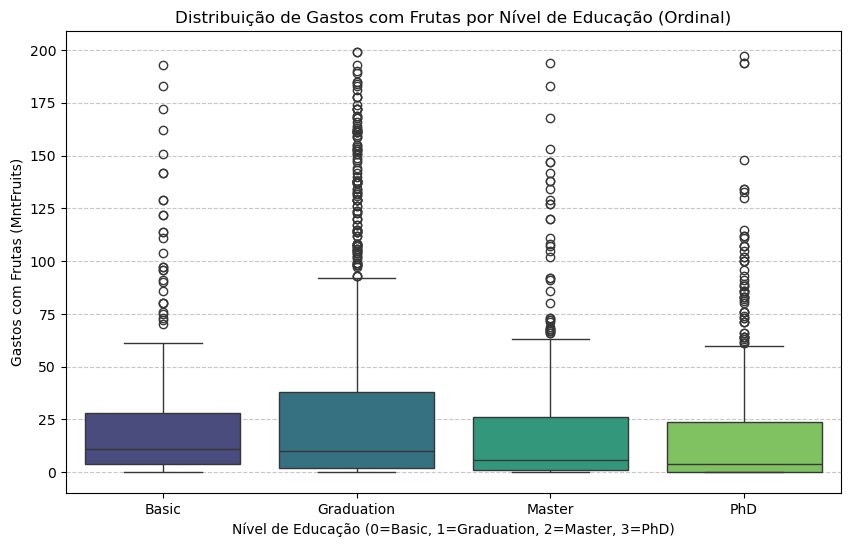

In [57]:
plt.figure(figsize=(10, 6))

# Usamos um Box Plot para mostrar a distribuição dos gastos com frutas para cada nível de educação.
# Isso nos permite ver não apenas a média, mas também a variância e os outliers dentro de cada grupo.
sns.boxplot(x='Education_Ordinal', y='MntFruits', data=df, palette='viridis')

plt.title('Distribuição de Gastos com Frutas por Nível de Educação (Ordinal)')
plt.xlabel('Nível de Educação (0=Basic, 1=Graduation, 2=Master, 3=PhD)')
plt.ylabel('Gastos com Frutas (MntFruits)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Basic', 'Graduation', 'Master', 'PhD']) # Rótulos para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

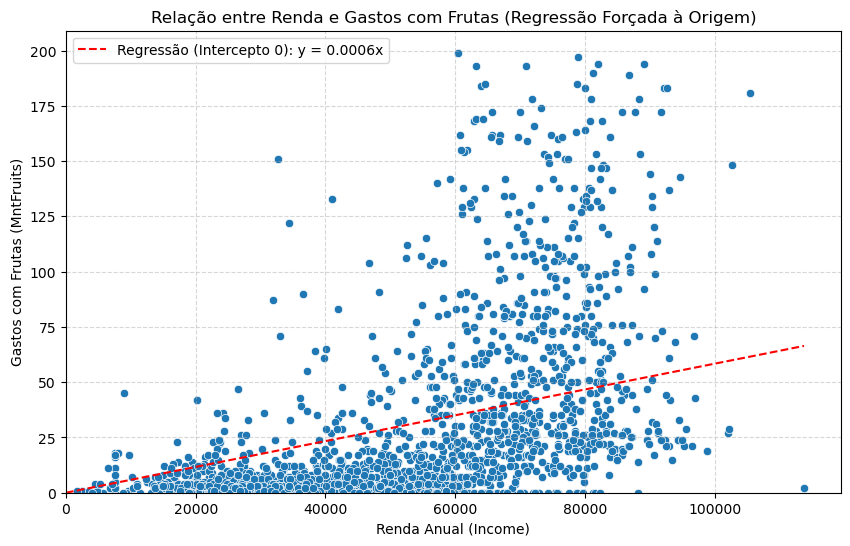

In [69]:
#Relação entre renda e alimentação mais saudável


# Plotar o Gráfico de Dispersão
plt.figure(figsize=(10, 6))

# Usamos um Scatter Plot com um regressor de linha (kde=False) para visualizar a tendência
sns.scatterplot(x='Income', y='MntFruits', data=df)
slope = (df['Income'] * df['MntFruits']).sum() / (df['Income']**2).sum()

# 3. Criar a linha de regressão
# Gerar pontos para a linha do 0 até o valor máximo de Income
x_line = np.linspace(0, df['Income'].max(), 100)
y_line = slope * x_line

# 4. Plotar a linha
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Regressão (Intercepto 0): y = {slope:.4f}x')


plt.title('Relação entre Renda e Gastos com Frutas (Regressão Forçada à Origem)')
plt.xlabel('Renda Anual (Income)')
plt.ylabel('Gastos com Frutas (MntFruits)')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.legend() # Mostra a legenda da linha de regressão
plt.xlim(left=0) # Garantir que o eixo X comece em 0
plt.ylim(bottom=0) # Garantir que o eixo Y comece em 0

plt.show()

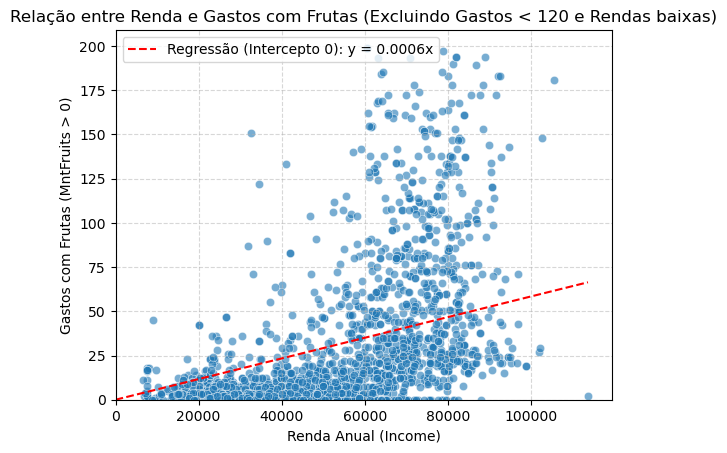

In [74]:
df_filtrado = df[df['MntFruits'] > 120].copy()
df_filtrado = df[df['Income'] > 6000].copy()

# 1. Plotar os pontos de dispersão do DataFrame FILTRADO
sns.scatterplot(x='Income', y='MntFruits', data=df_filtrado, alpha=0.6)

# 2. Calcular a inclinação (slope) usando os DADOS FILTRADOS
# y = mx (A melhor estimativa para 'm' é Sum(xy) / Sum(x^2))
slope = (df_filtrado['Income'] * df_filtrado['MntFruits']).sum() / (df_filtrado['Income']**2).sum()

# 3. Criar a linha de regressão
x_line = np.linspace(0, df_filtrado['Income'].max(), 100)
y_line = slope * x_line

# 4. Plotar a linha
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Regressão (Intercepto 0): y = {slope:.4f}x')


plt.title('Relação entre Renda e Gastos com Frutas (Excluindo Gastos < 120 e Rendas baixas)')
plt.xlabel('Renda Anual (Income)')
plt.ylabel('Gastos com Frutas (MntFruits > 0)')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [82]:
df['Education_Ordinal'] = df['Education'].map({'Basic': 0, 'Graduation': 1, 'Master': 2, 'PhD': 3})

# 1. Selecionar Features
features = [
    'Income', 'Education_Ordinal',
    'MntWines', 'MntFruits', 'MntMeatProducts', # Gastos 
    'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases' # Frequência
]
X = df[features].copy()

# 2. Padronizar os Dados (Scaling)
# Cria uma instância do padronizador
scaler = StandardScaler()
# Ajusta e transforma os dados
X_scaled = scaler.fit_transform(X)

print("Dados prontos para clustering (X_scaled)")

Dados prontos para clustering (X_scaled)


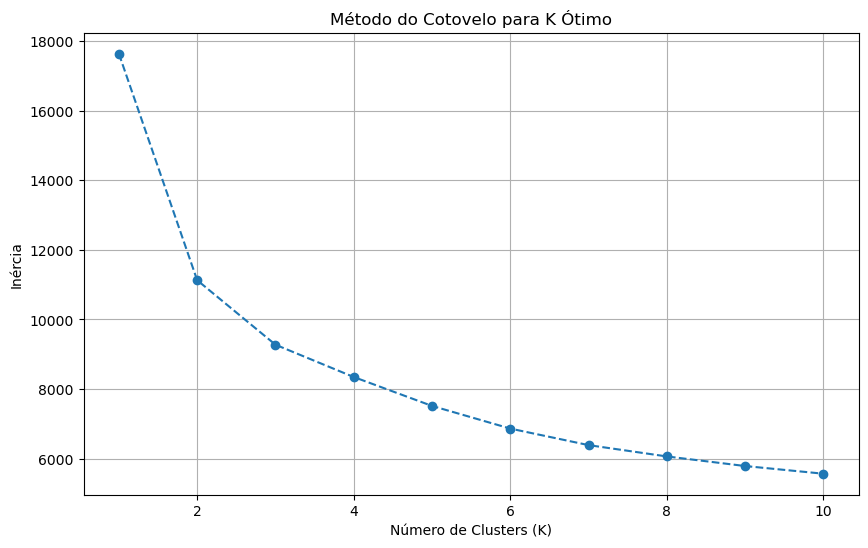

In [83]:
# Lista para armazenar a inércia (inertia) para diferentes valores de K
inertia = []
K_range = range(1, 11) # Testar de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o Método do Cotovelo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K Ótimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()
#

In [84]:
# Rodar o K-Means com o K escolhido (ex: K=3)
K_ideal = 3
kmeans = KMeans(n_clusters=K_ideal, random_state=42, n_init=10)

# Atribuir os labels de cluster ao DataFrame original
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Análise dos Clusters: Descrever os Centróides
# Os centróides representam o cliente "médio" de cada cluster
cluster_analysis = df.groupby('Cluster')[features].mean()

print("\n--- Análise dos Perfis dos Clusters (Valores Médios) ---")
print(cluster_analysis)


--- Análise dos Perfis dos Clusters (Valores Médios) ---
               Income  Education_Ordinal    MntWines  MntFruits  \
Cluster                                                           
0        75991.108247           1.446735  624.333333  71.348797   
1        34514.249755           1.354554   41.072478   5.317336   
2        57077.815615           1.734219  448.166113  18.712625   

         MntMeatProducts  NumDealsPurchases  NumWebPurchases  \
Cluster                                                        
0             447.737113           1.281787         5.168385   
1              22.857003           1.955926         2.067581   
2             133.875415           3.935216         6.516611   

         NumStorePurchases  
Cluster                     
0                 8.594502  
1                 3.233105  
2                 7.538206  
